# Exercise 1 
1. Using Numpy, generate 100 samples from the standard normal 
2. Plot the result as a time series
3. Plot the result as a histogram

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

To see proper work with numpy random seeds numbers use [Henri Woodcock][1], [Albert Thomas][2]

[1]: https://builtin.com/data-science/numpy-random-seed
[2]: https://albertcthomas.github.io/good-practices-random-number-generators/

In [2]:
rng = np.random.default_rng(2021)

In [3]:
x = np.arange(1,1001)
y = rng.standard_normal(1000)

In [4]:
x.shape, y.shape

((1000,), (1000,))

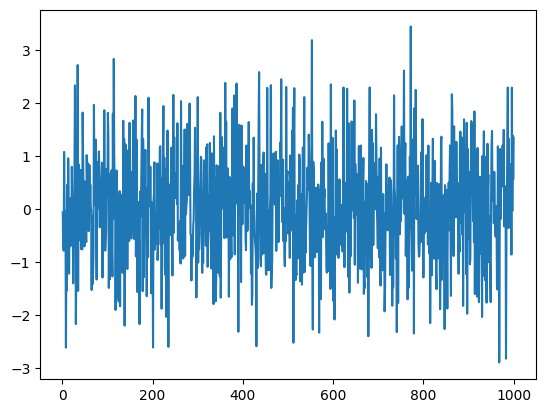

In [5]:
plt.plot(x, y);

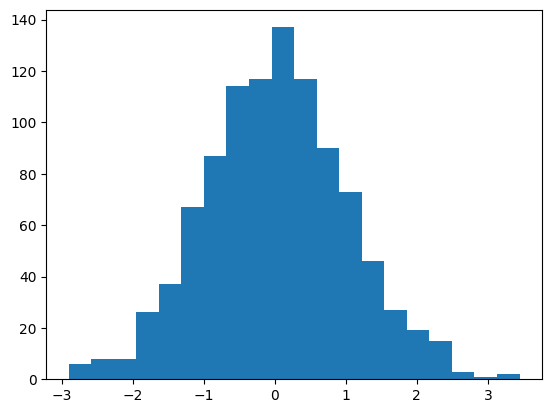

In [6]:
plt.hist(y, bins=20);

# Exercise 2 
1. Add a trend line to the noise 
2. Make a scatterplot
3. Bonus: find and plot the best-fit line

In [7]:
trend = np.linspace(0.01,10,1000)
print(trend[:5])
print(y[:5])

[0.01 0.02 0.03 0.04 0.05]
[-0.0688612  -0.68696559 -0.7884868   1.07600685 -0.01052417]


In [8]:
y2  = y+trend
print(y2[:5])

[-0.0588612  -0.66696559 -0.7584868   1.11600685  0.03947583]


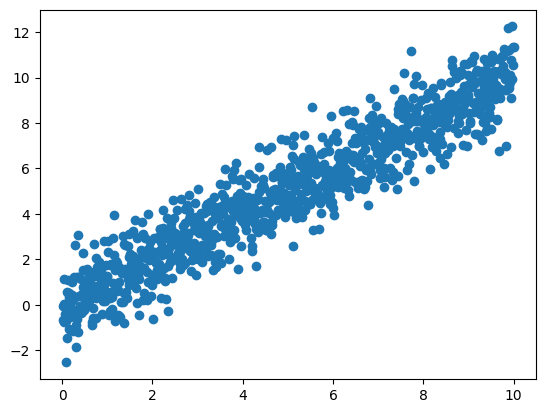

In [9]:
plt.scatter(trend,  y2);

To find best line `y = k*x + b` we will use nunpy [linalg.lstsq][1]

[1]: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

In [10]:
A = np.vstack([trend, np.ones(len(x))]).T
A

array([[ 0.01,  1.  ],
       [ 0.02,  1.  ],
       [ 0.03,  1.  ],
       ...,
       [ 9.98,  1.  ],
       [ 9.99,  1.  ],
       [10.  ,  1.  ]])

In [11]:
k, b = np.linalg.lstsq(A, y2, rcond=None)[0]
print(f"k = {k}, b = {b}")

k = 1.0031582461452373, b = 0.0094332318383309


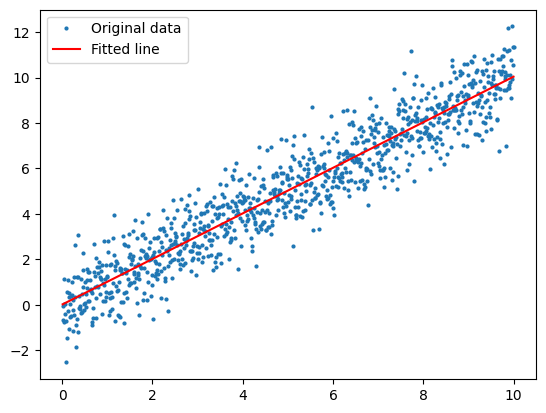

In [12]:
_ = plt.plot(trend, y2, 'o', label='Original data', markersize=2)
_ = plt.plot(trend, k*trend + b, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

# Exercise 3 
1. Call the `np.cumsum()` function on your noise
2. Plot the result
3. What does it remind you of?

In [13]:
y_sum = np.cumsum(y)

In [14]:
print(trend[:5])
print(y[:5])
print(y_sum[:5])

[0.01 0.02 0.03 0.04 0.05]
[-0.0688612  -0.68696559 -0.7884868   1.07600685 -0.01052417]
[-0.0688612  -0.75582679 -1.54431359 -0.46830674 -0.4788309 ]


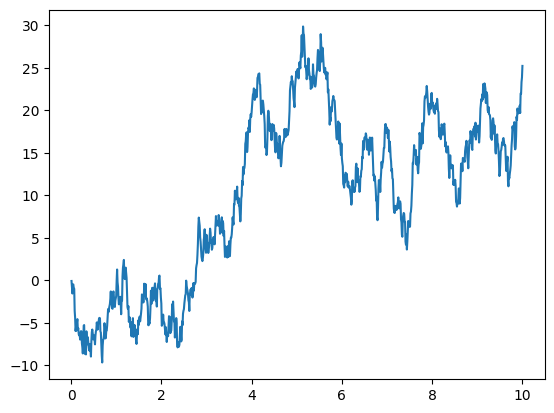

In [15]:
plt.plot(trend,y_sum);

# Exercise 4
- Generate and plot 1000 sample from the multivariate normal
- Use Scipy or any other library you prefer


In [16]:
from scipy.stats import multivariate_normal

In [17]:
mu = np.array([0, 0])
sigma2 = np.array([[1, -0.5],[-0.5, 2]])
print(mu)
print(sigma2)

[0 0]
[[ 1.  -0.5]
 [-0.5  2. ]]


build it we use [scipy.stats.multivariate_normal][1]

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

In [18]:
x,y = np.mgrid[-2:2:0.02,-2:2:0.02]
pos = np.dstack((x,y))
rv = multivariate_normal(mu, sigma2)

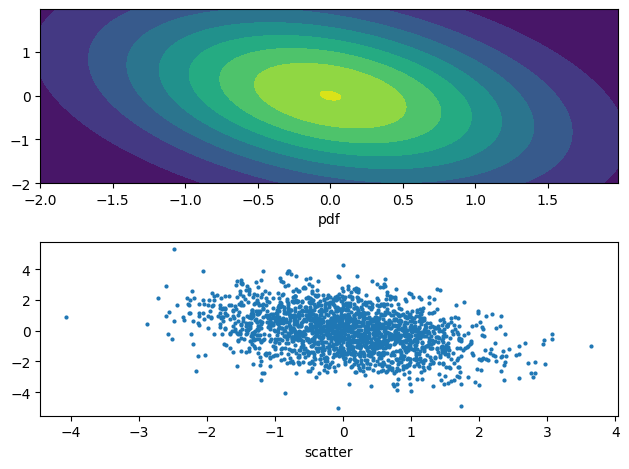

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.contourf(x,y,rv.pdf(pos));
ax1.set_xlabel('pdf');

data = rv.rvs(2000)
ax2.scatter(data[:,0],data[:,1], s=4);
ax2.set_xlabel('scatter');

plt.tight_layout()
plt.show()

Exercise 5

Calculate the sample mean and sample covariance of the data you just generated - are they close to what you expect?
- Don't use np.mean() or np.cov() 

In [23]:
data.shape[0]

2000

In [31]:
data_mean = np.array([data[:,0].sum(),data[:,1].sum()])/data.shape[0]
print(data_mean)
print(np.mean(data, axis=0))

[ 0.04398082 -0.01704205]
[ 0.04398082 -0.01704205]


In [27]:
dx = data[:,0]-data_mean[0]
print(type(dx))

<class 'numpy.ndarray'>


In [37]:
cov = np.dot(data[:,0]-data_mean[0], data[:,1]-data_mean[1])/(data.shape[0]-1)
print(cov)
print(np.cov(data.T))

-0.4828966650780384
[[ 0.96032292 -0.48289667]
 [-0.48289667  1.93815428]]
